Act 3. Programación Python para Big Data

Alumno: Jose Sepulveda

## Actividad 1

**Primera parte de la Actividad** (Hasta 5 puntos)
El/la alumno/a deberá enviar un archivo .ipynb con el ejercicio resuelto en clase. (Si alguien quiere mejorarlo también se tendrá en cuenta).
A continuación deja una celda en blanco o un par de ellas en el propio .ipynb y continúa con la siguiente parte de la actividad..
Al igual que siempre.. Pregunta y respuesta deberán ir en celdas diferentes.
-Segunda parte de la actividad
-Pregunta 1..
-Respuesta 1..
-Pregunta 2..
-Respuesta 2..
y así sucesivamente..

**Respuesta**:

In [1]:
# principales dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.classification import *

In [2]:
# lectura de datos
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# primer clasificador
clf = setup(data = df,
           target = "Survived",
           ignore_features = ["Name", "Ticket", "PassengerId"], )

,Description,Value
0,session_id,910
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
# comparativa de modelos
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8314,0.8722,0.7190,0.8184,0.7610,0.6322,0.6393,0.0270
lda,Linear Discriminant Analysis,0.8282,0.8494,0.7024,0.8203,0.7510,0.6223,0.6313,0.0110
lr,Logistic Regression,0.8218,0.8657,0.7241,0.7883,0.7514,0.6137,0.6181,0.3590
ridge,Ridge Classifier,0.8218,0.0000,0.7111,0.7974,0.7475,0.6115,0.6174,0.0040
catboost,CatBoost Classifier,0.8218,0.8656,0.6766,0.8294,0.7410,0.6076,0.6185,0.4740
lightgbm,Light Gradient Boosting Machine,0.8137,0.8528,0.7024,0.7865,0.7398,0.5958,0.6002,0.0490
ada,Ada Boost Classifier,0.7993,0.8403,0.7194,0.7462,0.7275,0.5695,0.5749,0.0210
xgboost,Extreme Gradient Boosting,0.7962,0.8424,0.7067,0.7502,0.7249,0.5635,0.5669,0.1870
rf,Random Forest Classifier,0.7817,0.8351,0.6554,0.7361,0.6923,0.5244,0.5273,0.0670
dt,Decision Tree Classifier,0.7801,0.7525,0.6889,0.7245,0.7038,0.5292,0.5319,0.0040


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=910, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [5]:
# creando modelo especifico
gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.9295,0.8750,0.8077,0.8400,0.7350,0.7366
1,0.8254,0.8900,0.7083,0.8095,0.7556,0.6207,0.6240
2,0.8254,0.8905,0.7500,0.7826,0.7660,0.6268,0.6272
3,0.8548,0.8997,0.7083,0.8947,0.7907,0.6819,0.6928
4,0.7742,0.8081,0.5833,0.7778,0.6667,0.5011,0.5130
5,0.8226,0.8099,0.7826,0.7500,0.7660,0.6232,0.6236
6,0.8548,0.8467,0.6522,0.9375,0.7692,0.6683,0.6917
7,0.8548,0.9153,0.8261,0.7917,0.8085,0.6917,0.6921
8,0.8387,0.8317,0.6522,0.8824,0.7500,0.6349,0.6507
9,0.7903,0.9008,0.6522,0.7500,0.6977,0.5384,0.5415


In [6]:
lightb = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.8996,0.7500,0.9000,0.8182,0.7219,0.7289
1,0.7937,0.8194,0.7500,0.7200,0.7347,0.5660,0.5663
2,0.8254,0.8750,0.7083,0.8095,0.7556,0.6207,0.6240
3,0.8548,0.9024,0.7083,0.8947,0.7907,0.6819,0.6928
4,0.7258,0.7895,0.5417,0.6842,0.6047,0.3991,0.4055
5,0.7742,0.7932,0.6957,0.6957,0.6957,0.5162,0.5162
6,0.8065,0.8027,0.6522,0.7895,0.7143,0.5699,0.5759
7,0.8387,0.9097,0.7391,0.8095,0.7727,0.6481,0.6497
8,0.8387,0.8662,0.6957,0.8421,0.7619,0.6416,0.6483
9,0.8065,0.8707,0.7826,0.7200,0.7500,0.5926,0.5939


In [7]:
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7937,0.8723,0.6667,0.7619,0.7111,0.5517,0.5547
1,0.7778,0.8638,0.7083,0.7083,0.7083,0.5288,0.5288
2,0.7937,0.8654,0.6667,0.7619,0.7111,0.5517,0.5547
3,0.8226,0.8361,0.7083,0.8095,0.7556,0.6173,0.6207
4,0.7258,0.7999,0.5000,0.7059,0.5854,0.3893,0.4023
5,0.8226,0.8389,0.7391,0.7727,0.7556,0.6164,0.6168
6,0.7258,0.7938,0.5652,0.6500,0.6047,0.3963,0.3986
7,0.8387,0.8501,0.7391,0.8095,0.7727,0.6481,0.6497
8,0.8065,0.8261,0.6957,0.7619,0.7273,0.5778,0.5792
9,0.7097,0.8043,0.5652,0.6190,0.5909,0.3666,0.3675


In [8]:
tune_gbc_auc = tune_model(gbc, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6190,0.9103,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6190,0.8515,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6190,0.8638,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6129,0.8936,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6129,0.8037,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6290,0.7848,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6290,0.8272,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6290,0.9275,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6290,0.8328,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.6290,0.8634,0.0000,0.0000,0.0000,0.0000,0.0000


In [9]:
tune_gbc_acc = tune_model(gbc, optimize="Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7937,0.8194,0.7083,0.7391,0.7234,0.5590,0.5593
1,0.8095,0.8162,0.7500,0.7500,0.7500,0.5962,0.5962
2,0.8254,0.8771,0.7083,0.8095,0.7556,0.6207,0.6240
3,0.7742,0.8542,0.6667,0.7273,0.6957,0.5167,0.5179
4,0.7097,0.7188,0.4167,0.7143,0.5263,0.3373,0.3628
5,0.7903,0.8133,0.7391,0.7083,0.7234,0.5547,0.5550
6,0.7903,0.7804,0.5652,0.8125,0.6667,0.5208,0.5391
7,0.8226,0.8919,0.6957,0.8000,0.7442,0.6094,0.6129
8,0.8065,0.8043,0.6522,0.7895,0.7143,0.5699,0.5759
9,0.8226,0.8361,0.6957,0.8000,0.7442,0.6094,0.6129


In [10]:
tune_lightb_auc = tune_model(lightb, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6190,0.9257,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6190,0.8499,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6190,0.8691,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6129,0.8361,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6129,0.8213,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6290,0.8055,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6290,0.8484,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6290,0.9381,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6290,0.8406,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.6290,0.9047,0.0000,0.0000,0.0000,0.0000,0.0000


In [11]:
tune_lightb_acc = tune_model(lightb, optimize="Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.9279,0.8333,0.8333,0.8333,0.7308,0.7308
1,0.8095,0.8675,0.7083,0.7727,0.7391,0.5896,0.5910
2,0.7778,0.8771,0.6667,0.7273,0.6957,0.5212,0.5224
3,0.8710,0.8229,0.7083,0.9444,0.8095,0.7149,0.7319
4,0.7419,0.7856,0.4583,0.7857,0.5789,0.4109,0.4420
5,0.8065,0.7960,0.7391,0.7391,0.7391,0.5853,0.5853
6,0.8710,0.8395,0.6522,1.0000,0.7895,0.7023,0.7356
7,0.8710,0.9186,0.8261,0.8261,0.8261,0.7235,0.7235
8,0.8387,0.8339,0.6522,0.8824,0.7500,0.6349,0.6507
9,0.8065,0.8807,0.6957,0.7619,0.7273,0.5778,0.5792


In [12]:
tune_rf_auc = tune_model(rf, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8686,0.6667,0.8000,0.7273,0.5828,0.5885
1,0.7937,0.8451,0.7500,0.7200,0.7347,0.5660,0.5663
2,0.8571,0.8745,0.7917,0.8261,0.8085,0.6947,0.6951
3,0.8065,0.8438,0.6250,0.8333,0.7143,0.5724,0.5860
4,0.7742,0.7834,0.7083,0.7083,0.7083,0.5241,0.5241
5,0.7581,0.7559,0.7826,0.6429,0.7059,0.5037,0.5108
6,0.8065,0.8278,0.6087,0.8235,0.7000,0.5618,0.5758
7,0.8387,0.9153,0.6957,0.8421,0.7619,0.6416,0.6483
8,0.8226,0.8428,0.6522,0.8333,0.7317,0.6021,0.6122
9,0.8065,0.8244,0.7391,0.7391,0.7391,0.5853,0.5853


In [13]:
tune_rf_acc = tune_model(rf, optimize="Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8686,0.6667,0.8000,0.7273,0.5828,0.5885
1,0.7937,0.8451,0.7500,0.7200,0.7347,0.5660,0.5663
2,0.8571,0.8745,0.7917,0.8261,0.8085,0.6947,0.6951
3,0.8065,0.8438,0.6250,0.8333,0.7143,0.5724,0.5860
4,0.7742,0.7834,0.7083,0.7083,0.7083,0.5241,0.5241
5,0.7581,0.7559,0.7826,0.6429,0.7059,0.5037,0.5108
6,0.8065,0.8278,0.6087,0.8235,0.7000,0.5618,0.5758
7,0.8387,0.9153,0.6957,0.8421,0.7619,0.6416,0.6483
8,0.8226,0.8428,0.6522,0.8333,0.7317,0.6021,0.6122
9,0.8065,0.8244,0.7391,0.7391,0.7391,0.5853,0.5853


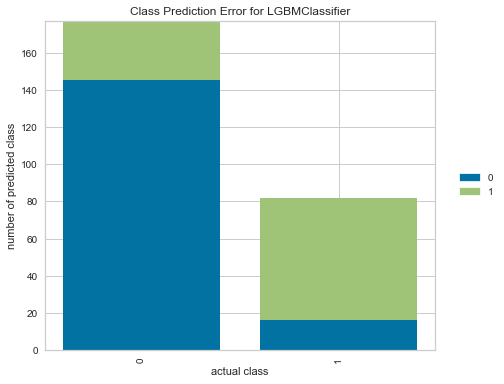

In [14]:
plot_model(tune_lightb_acc, plot = "error")

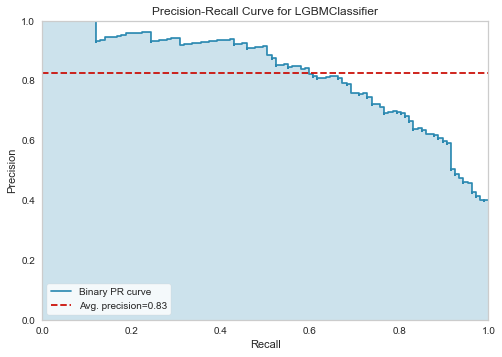

In [15]:
plot_model(tune_lightb_acc, plot = "pr")

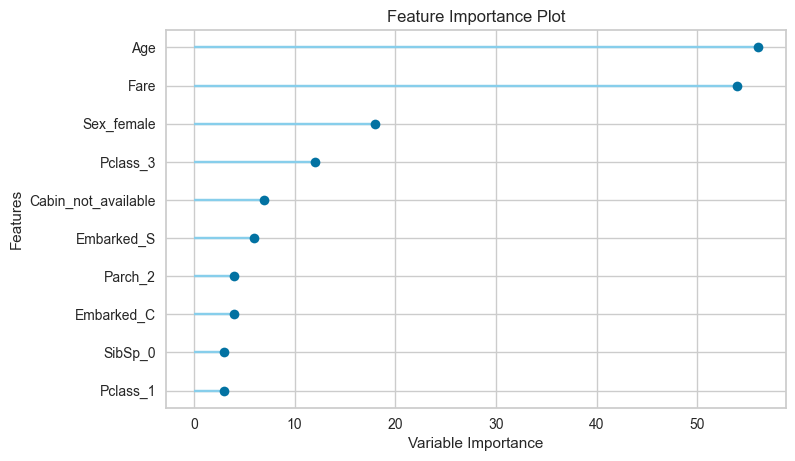

In [16]:
plot_model(tune_lightb_acc, plot="feature")

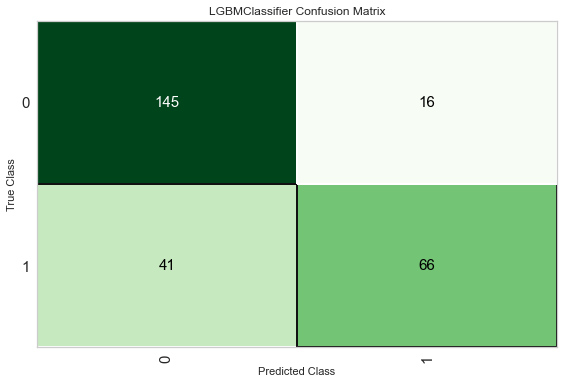

In [17]:
plot_model(tune_lightb_acc, plot="confusion_matrix")

In [18]:
evaluate_model(tune_lightb_acc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
# se cargan los datos de test
df_test = pd.read_csv("test.csv")
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [20]:
pred = predict_model(tune_lightb_acc, data = df_test)
pred[["PassengerId", "Label"]]

,PassengerId,Label
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


**Segunda parte de la actividad** (Hasta 2 puntos): símplemente queremos saber tu opinión al respecto de AutoML.
Queremos saber:

NOTA: Esta actividad se puntuará independientemente de lo que se responda.

- Pregunta 1 - ¿Te costó esfuerzo aprender el presente tema?

**Respuesta:**

El modulo _pycaret_ simplifica y abstrae bastante el entrenamiento de un modelo ya se de clasificación o regresión. No cuesta practicamente esfuerzo lograr entrenar un modelo de ML

- Pregunta 2 - ¿Qué te ha llamado la atención de PyCaret?

**Respuesta:**

Con una sola sentencia (_setup_) se analiza el set de datos que tenemos y se entrena una batería de modelos que tienen diferente lógica. Esto permite tener una primera comparativa tanto la calidad de nuestros datos como identificar que modelo de ML se puede ajustar mejor a ellos.

- Pregunta 3 - ¿Notas que es más simple haciéndolo así que como se hizo en Fundamentos de Big Data? Si opinas diferente la respuesta no es correcta/incorrecta, siempre y cuando argumentes tu respuesta.

***Respuesta:***

Es paquete simplifica en gran medida el entrenmiento de un algoritmo de ML learning en comparativa con otros modulos, como puede ser sklearn. La parte de tunear el modelo tambien es bastante mas simple.

- Pregunta 4 - Busca más herramientas AutoML que existan y enumera alguna (simplemente queremos que te familiarices con ello, nada más).

**Respuesta:**

Por mencionar algunas de las librerias encontras estan: Auto-Sklearn, Hyperopt-Sklearn, TPOT, Auto-Keras, H2O AutoML.

PD: parece que _pycaret_ es de desarrollo relativamente nuevo porque de los artículos revisados en ninguno es mencionado. Una joya que todavia no se ha descubierto.

**Tercera parte de la actividad** (Hasta 1 punto): hemos mencionado un parámetro llamado AUC.
Haz un pequeño resumen con información que encuentres en Internet acerca de AUC y la curva ROC.
Puedes añadir la fuente donde obtuviste la información.
No es relevante todavía pero, estaría bien si lees algo al respecto.
Si te cuesta entenderlo, puedes, sin problema comentarlo.
(Habíamos comentado que se explicará en asignaturas sucesivas, pero si aprendes algo al respecto ahora te vendrá bien para entender un poco mejor el tema).

**Respuesta:**

Los parámetros AUC y ROC son dos métricas utilizadas para cuantificar la predictibilidad de un clasificador, son dos métricas que estas relacionadas. La mémtrica ROC (_Receiver Operating Characteristic_) indica que tan bueno es el modelo diferenciar entre 2 cosas (en nustro caso el label de la variable target). Normalmente es una curva y esta se obtiene al graficar el desempeño del clasificador a los diferentes umbrales (probabilidades del label). La metrica AUC es el area bajo esta curva, para caso practico esta toma valores entre 0.5 y 1, siendo 1 cuando el clasificador logra distinguir perfectamente los 2 labels y 0.5 cuando no logra distinguirlos.

**Cuarta parte de la actividad** (Hasta 1 punto): hemos usado la Confusion Matrix en esta lección, pero no hemos explicado mucho,
Haz un pequeño resumen con información que encuentres en Internet acerca de esto.
No es relevante todavía pero, estaría bien si lees algo al respecto.
Si te parece complicado, o no lo entiendes puedes comentarlo.

**Respuesta:**

La _Confusion Matrix_ se utiliza en clasificadores y, al igual que AUC y ROC, permite cuantificar el desepeño del modelo. Esta tabla se crea colocando en uno de los ejes los labels reales de la variable target y en el otro los labels predichos, creado una matriz 2x2 (para una variable target de 2 labels). Se generan 4 categorias:
- _True Positives_: cuando el modelo clasifica de manera correcta los valores positivos.
- _True Negatives_: cuando el modelo clasifica de manera correcta los valores negativos.
- _False Positives_: cuando el modelo clasifica de manera positivas valores que son negativos.
- _False Negatives_: cuando el modelo clasifica de manera negativa valores que son positivos.

Con estas datos se puedes crear variables metricas como la presicion, F1, recall, accuracy, etc.

**Quinta parte de la actividad** (Hasta 1 punto): envía tu predicción a Kaggle y adjunta un pantallazo con tu resultado.
Formato: .png o cualquier formato compatible con Moodle.

In [21]:
# submssion on kagle
df_submission = pd.read_csv('gender_submission.csv')
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [26]:
# seleccionamos 5 modelos: lr, gbc, lightgbm, rf, ada

lr = create_model("lr")
gbc = create_model("gbc")
lightgbm = create_model("lightgbm")
rf = create_model("rf")
ada = create_model("ada")

# modelo de voting classifier
blender = blend_models(estimator_list = [lr, gbc, lightgbm, rf, ada], method = 'hard')

# modelo de stacking classifier
stacker = stack_models(estimator_list = [lr, gbc, lightgbm, ada], meta_model = rf)

# realizamos predicciones
pred_blender = predict_model(blender, data = df_test)
pred_stacker = predict_model(stacker, data = df_test)


# creamos columna con los resultados
df_submission["PassengerId"] = pred_blender["PassengerId"]
df_submission['Survived'] = pred_blender["Label"]

# guardamos resultados en csv
df_submission.to_csv('titanic_blender.csv', index=False)

# creamos columna con los resultados
df_submission["PassengerId"] = pred_stacker["PassengerId"]
df_submission['Survived'] = pred_stacker["Label"]

# guardamos resultados en csv
df_submission.to_csv('titanic_stacker.csv', index=False)b

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.8937,0.7500,0.8571,0.8000,0.6897,0.6934
1,0.8095,0.8483,0.7500,0.7500,0.7500,0.5962,0.5962
2,0.8095,0.8851,0.6667,0.8000,0.7273,0.5828,0.5885
3,0.8387,0.8520,0.6667,0.8889,0.7619,0.6437,0.6589
4,0.7258,0.8141,0.5417,0.6842,0.6047,0.3991,0.4055
5,0.8226,0.8122,0.7391,0.7727,0.7556,0.6164,0.6168
6,0.8710,0.8205,0.6522,1.0000,0.7895,0.7023,0.7356
7,0.8710,0.9253,0.7826,0.8571,0.8182,0.7185,0.7203
8,0.8065,0.8183,0.6087,0.8235,0.7000,0.5618,0.5758
9,0.7581,0.8612,0.6522,0.6818,0.6667,0.4769,0.4772


En la imagen siguiente se observa los resultado obtenidos de los modelos _stack_ y _blender_. Como se observa, comparando con los resultados obtenidos aplicando sklearn, los resultados son similares. Esto nos indica 2 cosas: que la automatización no hace "magia" generando mejores resultados, solo simplifica el trabajo de entrenar modelo, y 2 que el trabajo de _feature enginering_ y exploración de los datos sigue teniendo validez si queremos mejorar los resultados.

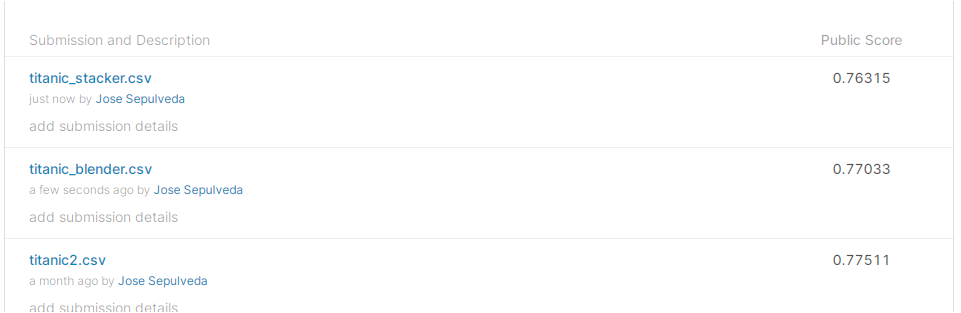